<h1 align="center">Regularization</h1>

In order to understand backpropagation, you will implement a backpropagation algorithm for a neural network from scratch.    
Backpropagation can be used for both classification and regression problems, we will focus on classification in this exercise.

## *Table of Contents*

- [Requirements](#requirements)
- [Overfitting and Underfitting](#overfitting_and_underfitting)
  - [Exercice 1](#exercice1)
  - [Exercice 2](#exercice2)
  - [Exercice 3](#exercice3)
  - [Exercice 4](#exercice4)
  - [Exercice 5](#exercice5)
  - [Exercice 6](#exercice6)
  - [Exercice 7](#exercice7)
  - [Exercice 8](#exercice8)
  - [Exercice 9](#exercice9)
  - [Exercice 10](#exercice10)
  - [Exercice 11](#exercice11)
- [Weight regularization](#weight_regularization)
  - [Exercice 12](#exercice12)
  - [Exercice 13](#exercice13)
  - [Exercice 14](#exercice14)
- [Adding Dropout](#adding_dropout)
  - [Exercice 15](#exercice15)
  - [Exercice 16](#exercice16)
  - [Exercice 17](#exercice17)
- [House Price DataSet](#house_price_dataSet)
  - [Exercice 1](#house-exercice1)
  - [Exercice 2](#house-exercice2)
  - [Exercice 3](#house-exercice3)
  - [Exercice 4](#house-exercice4)
  - [Exercice 5](#house-exercice5)
  - [Exercice 6](#house-exercice6)
  - [Exercice 7](#house-exercice7)
  - [Exercice 8](#house-exercice8)
  - [Exercice 9](#house-exercice9)
  - [Exercice 10](#house-exercice10)


<a name="requirements">

## Requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb,boston_housing

try:
  %tensorflow_version 2.x
except Exception:
  pass

<a name="overfitting_and_underfitting">

## Overfitting and Underfitting

<a name="exercice1">

### Exercice 1
Load IMDB dataset from Keras with maximum number of num words =
10000 to include.   
It is a large dataset containing the text of 50, 000 movie re-
views from the Internet Movie Database. This is a dataset for binary sentiment
classification of movies containing {0, 1}.   
Check train and test datasets sizes and shapes.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(f"Train size: {train_data.shape[0]}, Train shape: {train_data.shape}",
      f"Avg length of train elements: {sum(map(lambda x: len(x),train_data))/train_data.shape[0]}",
      f"Test size: {test_data.shape[0]}, Test shape: {test_data.shape}",
      f"Avg length of test elements: {sum(map(lambda x: len(x),test_data))/test_data.shape[0]}",
      sep="\n")

Train size: 25000, Train shape: (25000,)
Avg length of train elements: 238.71364
Test size: 25000, Test shape: (25000,)
Avg length of test elements: 230.8042


<a name="exercice2">

### Exercice 2
Prepare the data using the following code:

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all - zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

check new train and test sets shapes and sizes. What have changed?

In [ ]:
print(f"x_train size: {x_train.shape[0]}, x_train shape: {x_train.shape}",
      f"x_test size: {x_test.shape[0]}, x_test shape: {x_test.shape}",
      f"y_train size: {y_train.shape[0]}, y_train shape: {y_train.shape}",
      f"y_test size: {y_test.shape[0]}, y_test shape: {y_test.shape}",
      sep="\n")

x_train size: 25000, x_train shape: (25000, 10000)
x_test size: 25000, x_test shape: (25000, 10000)
y_train size: 25000, y_train shape: (25000,)
y_test size: 25000, y_test shape: (25000,)


We have a fixed number of element for each sequence.

<a name="exercice3">

### Exercice 3: Reducing the network size
Design a neural network model namely original model with two dense layers of size 16 and each followed with an activation function relu.  
Add a final layer of 1 node and an activation function of sigmoid.  
For your network compilation, define a rmsprop optimizer, with a binary crossentropy and acc as the metric.

In [ ]:
original_model = keras.Sequential([
      keras.layers.Dense(units=16, activation="relu", input_shape=(10000,)),
      keras.layers.Dense(units=16, activation="relu"),
      keras.layers.Dense(units=1, activation="sigmoid")
])

original_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="acc"
)

original_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


<a name="exercice4">

### Exercice 4
Design a neural network model namely smaller model with two dense layers of size 4 and each followed with an activation function relu.  
Add a final layer of 1 node and an activation function of sigmoid. For your network com- pilation, define a rmsprop optimizer, with a binary crossentropy and acc as the metric.

In [ ]:
smaller_model = keras.Sequential([
      keras.layers.Dense(units=4, activation="relu", input_shape=(10000,)),
      keras.layers.Dense(units=4, activation="relu"),
      keras.layers.Dense(units=1, activation="sigmoid")
])

smaller_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="acc"
)

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 40004     
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


<a name="exercice5">

### Exercice 5
Fit the original model on the train set with the test set as the
validation set, 20 epochs and batch size = 512 and save it in original hist


In [ ]:
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 59ms/step - loss: 0.4560 - acc: 0.8162 - val_loss: 0.3433 - val_acc: 0.8762
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2647 - acc: 0.9088 - val_loss: 0.2863 - val_acc: 0.8896
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2001 - acc: 0.9296 - val_loss: 0.3032 - val_acc: 0.8787
Epoch 4/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1696 - acc: 0.9388 - val_loss: 0.2907 - val_acc: 0.8850
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1456 - acc: 0.9487 - val_loss: 0.3125 - val_acc: 0.8777
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1266 - acc: 0.9562 - val_loss: 0.3356 - val_acc: 0.8739
Epoch 7/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1096 - acc: 0.9628 - val_loss: 0.3583 - val_acc: 0.8712
Epoch 8/20
49/49 [==============================] - 2s 50ms/step - loss: 0.0998 - a

<a name="exercice6">

### Exercice 6
Fit the smaller model on the train set with the test set as the validation set,
20 epochs and batch size = 512 and save it in smaller hist.

In [ ]:
smaller_hist = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 62ms/step - loss: 0.5546 - acc: 0.8000 - val_loss: 0.4621 - val_acc: 0.8670
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3790 - acc: 0.8948 - val_loss: 0.3619 - val_acc: 0.8822
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2925 - acc: 0.9119 - val_loss: 0.3165 - val_acc: 0.8858
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2430 - acc: 0.9231 - val_loss: 0.2952 - val_acc: 0.8870
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2107 - acc: 0.9314 - val_loss: 0.2808 - val_acc: 0.8908
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1865 - acc: 0.9386 - val_loss: 0.2890 - val_acc: 0.8834
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1692 - acc: 0.9435 - val_loss: 0.2800 - val_acc: 0.8884
Epoch 8/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1549 - a

<a name="exercice7">

### Exercice 7
Get the val loss from the trained model histogram and save them in
new variables.

In [ ]:
original_val_loss = original_hist.history["val_loss"]
smaller_val_loss = smaller_hist.history["val_loss"]

<a name="exercice8">

### Exercice 8
Plot the validation loss values w.r.t the epochs (we have 20 epochs) and observe the loss value changing trough the epochs increase.  
- What do you observe? 
- Which network starts overfitting later?
- After hom many epochs each network starts overfitting?.
    
Notice that the loss should reduce during the epochs changing, as soon as the loss starts to increase, overfitting happens.

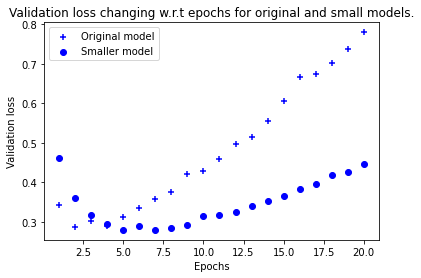

In [ ]:
x = np.arange(1,21)
plt.figure()
plt.scatter(x, original_val_loss, label="Original model", c="b", marker="+")
plt.scatter(x, smaller_val_loss, label="Smaller model", c="b", marker="o")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss changing w.r.t epochs for original and small models.")
plt.show()

I observe that both model overfit the data.  
Indeed, after only 2 epochs, the original model starts overfitting, contrary to the smaller model that overfit after 5-7 epochs.

<a name="exercice9">

### Exercice 9
Design a network that has much more capacity, far more than the prob-
lem would warrant.  
Call this model bigger model with two dense layers of size 512 and each followed with an activation function relu.  
Add a final layer of 1 node and an activation function of sigmoid.  
For your network compilation, define a rmsprop optimizer, with a binary crossentropy and acc as the metric.

In [ ]:
bigger_model = keras.Sequential([
      keras.layers.Dense(units=512, activation="relu", input_shape=(10000,)),
      keras.layers.Dense(units=512, activation="relu"),
      keras.layers.Dense(units=1, activation="sigmoid")
])

bigger_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="acc"
)

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               5120512   
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


<a name="exercice10">

### Exercice 10
Fit the bigger model on the train set with the test set as the validation set,
20 epochs and batch size = 512 and save it in bigger hist

In [ ]:
bigger_hist = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 18s 353ms/step - loss: 0.4622 - acc: 0.7988 - val_loss: 0.2925 - val_acc: 0.8856
Epoch 2/20
49/49 [==============================] - 17s 339ms/step - loss: 0.2221 - acc: 0.9117 - val_loss: 0.3850 - val_acc: 0.8450
Epoch 3/20
49/49 [==============================] - 16s 338ms/step - loss: 0.1419 - acc: 0.9466 - val_loss: 0.3209 - val_acc: 0.8806
Epoch 4/20
49/49 [==============================] - 16s 339ms/step - loss: 0.0704 - acc: 0.9770 - val_loss: 0.3820 - val_acc: 0.8835
Epoch 5/20
49/49 [==============================] - 17s 339ms/step - loss: 0.0811 - acc: 0.9861 - val_loss: 0.4064 - val_acc: 0.8794
Epoch 6/20
49/49 [==============================] - 25s 506ms/step - loss: 0.0037 - acc: 0.9996 - val_loss: 0.6369 - val_acc: 0.8809
Epoch 7/20
49/49 [==============================] - 21s 423ms/step - loss: 0.1110 - acc: 0.9879 - val_loss: 0.6833 - val_acc: 0.8571
Epoch 8/20
49/49 [==============================] - 24s 490ms/step - 

<a name="exercice11">

### Exercice 11
Plot the bigger and original validation loss changing w.r.t epochs
changing.  
Similar to exercise 18.  
How the bigger network loss changes regarding to the original network? The more capacity the network has, the quicker it will be able to model the training data, but if it converges quickly to 0, this is more susceptible for overfitting!

In [ ]:
bigger_val_loss = bigger_hist.history["val_loss"]

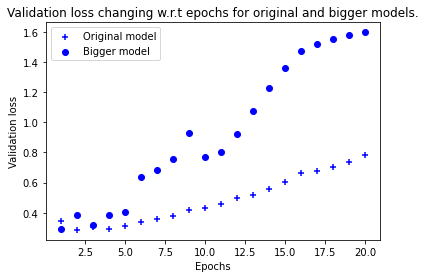

In [ ]:
x = np.arange(1,21)
plt.figure()
plt.scatter(x, original_val_loss, label="Original model", c="b", marker="+")
plt.scatter(x, bigger_val_loss, label="Bigger model", c="b", marker="o")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss changing w.r.t epochs for original and bigger models.")
plt.show()

<a name="weight_regularization">

## Weight regularization

<a name="exercice12">

### Exercice 12
Modify the original network as l2_model by adding an L2 weight
regularization to the model. Add the L2 regularizers to the first two layers.

In [ ]:
l2_model = keras.Sequential([
      keras.layers.Dense(units=16, activation="relu", kernel_regularizer=k.regularizers.l2(0.001), input_shape=(10000,)),
      keras.layers.Dense(units=16, activation="relu", kernel_regularizer=k.regularizers.l2(0.001)),
      keras.layers.Dense(units=1, activation="sigmoid")
])

l2_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="acc"
)

l2_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


<a name="exercice13">

### Exercice 13
Fit the model on train set with previously presented parameters. 

In [ ]:
l2_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 9s 154ms/step - loss: 0.5027 - acc: 0.8160 - val_loss: 0.3782 - val_acc: 0.8808
Epoch 2/20
49/49 [==============================] - 4s 72ms/step - loss: 0.3130 - acc: 0.9040 - val_loss: 0.3287 - val_acc: 0.8898
Epoch 3/20
49/49 [==============================] - 3s 71ms/step - loss: 0.2655 - acc: 0.9193 - val_loss: 0.3244 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 3s 69ms/step - loss: 0.2442 - acc: 0.9286 - val_loss: 0.3372 - val_acc: 0.8831
Epoch 5/20
49/49 [==============================] - 3s 71ms/step - loss: 0.2303 - acc: 0.9345 - val_loss: 0.3429 - val_acc: 0.8806
Epoch 6/20
49/49 [==============================] - 3s 56ms/step - loss: 0.2189 - acc: 0.9404 - val_loss: 0.3587 - val_acc: 0.8771
Epoch 7/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2130 - acc: 0.9422 - val_loss: 0.3588 - val_acc: 0.8794
Epoch 8/20
49/49 [==============================] - 3s 56ms/step - loss: 0.2099 - 

<a name="exercice14">

### Exercice 14
Plot the validation loss w.r.t epochs changing for original model and
l2 model.Observe, the model with L2 regularization and see how it is more
resistant to overfitting than the original model, even though both models have
the same number of parameters.
As alternatives to L2 regularization, you could use one of the following Keras
weight regularizers:
- l1
~~~ python
from keras import regularizers
regularizers.l1(0.001)
~~~
- l2
~~~ python
# L1 and L2 regula rization at the same time
regularizers . l1_l2 ( l1 =0.001 , l2 =0.001)
~~~

In [ ]:
l2_val_loss = l2_hist.history["val_loss"]

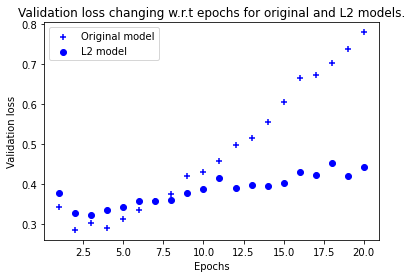

In [ ]:
x = np.arange(1,21)
plt.figure()
plt.scatter(x, original_val_loss, label="Original model", c="b", marker="+")
plt.scatter(x, l2_val_loss, label="L2 model", c="b", marker="o")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss changing w.r.t epochs for original and L2 models.")
plt.show()

#### L1

In [ ]:
l1_model = keras.Sequential([
      keras.layers.Dense(units=16, activation="relu", kernel_regularizer=k.regularizers.l1(0.001), input_shape=(10000,)),
      keras.layers.Dense(units=16, activation="relu", kernel_regularizer=k.regularizers.l1(0.001)),
      keras.layers.Dense(units=1, activation="sigmoid")
])

l1_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="acc"
)

l1_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l1_hist = l1_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 62ms/step - loss: 0.9105 - acc: 0.7816 - val_loss: 0.6388 - val_acc: 0.8543
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 0.6111 - acc: 0.8503 - val_loss: 0.6176 - val_acc: 0.8308
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.5704 - acc: 0.8587 - val_loss: 0.5707 - val_acc: 0.8563
Epoch 4/20
49/49 [==============================] - 2s 46ms/step - loss: 0.5535 - acc: 0.8632 - val_loss: 0.5491 - val_acc: 0.8633
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5389 - acc: 0.8682 - val_loss: 0.5413 - val_acc: 0.8647
Epoch 6/20
49/49 [==============================] - 4s 83ms/step - loss: 0.5262 - acc: 0.8712 - val_loss: 0.5395 - val_acc: 0.8622
Epoch 7/20
49/49 [==============================] - 2s 48ms/step - loss: 0.5186 - acc: 0.8748 - val_loss: 0.5180 - val_acc: 0.8708
Epoch 8/20
49/49 [==============================] - 3s 56ms/step - loss: 0.5128 - a

#### L1-L2

In [ ]:
l1_l2_model = keras.Sequential([
      keras.layers.Dense(units=16, activation="relu", kernel_regularizer=k.regularizers.l1_l2(l1=0.001, l2=0.001), input_shape=(10000,)),
      keras.layers.Dense(units=16, activation="relu", kernel_regularizer=k.regularizers.l1_l2(l1=0.001, l2=0.001)),
      keras.layers.Dense(units=1, activation="sigmoid")
])

l1_l2_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="acc"
)

l1_l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160016    
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l1_l2_hist = l1_l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 57ms/step - loss: 0.9604 - acc: 0.7569 - val_loss: 0.7075 - val_acc: 0.8034
Epoch 2/20
49/49 [==============================] - 2s 47ms/step - loss: 0.6594 - acc: 0.8401 - val_loss: 0.6219 - val_acc: 0.8556
Epoch 3/20
49/49 [==============================] - 2s 49ms/step - loss: 0.6053 - acc: 0.8532 - val_loss: 0.5983 - val_acc: 0.8549
Epoch 4/20
49/49 [==============================] - 3s 64ms/step - loss: 0.5850 - acc: 0.8557 - val_loss: 0.5759 - val_acc: 0.8587
Epoch 5/20
49/49 [==============================] - 3s 64ms/step - loss: 0.5690 - acc: 0.8610 - val_loss: 0.5652 - val_acc: 0.8612
Epoch 6/20
49/49 [==============================] - 4s 83ms/step - loss: 0.5549 - acc: 0.8635 - val_loss: 0.5567 - val_acc: 0.8616
Epoch 7/20
49/49 [==============================] - 4s 74ms/step - loss: 0.5516 - acc: 0.8638 - val_loss: 0.5479 - val_acc: 0.8647
Epoch 8/20
49/49 [==============================] - 3s 67ms/step - loss: 0.5407 - a

#### Full comparison

In [ ]:
l1_val_loss = l1_hist.history["val_loss"]
l1_l2_val_loss = l1_l2_hist.history["val_loss"]

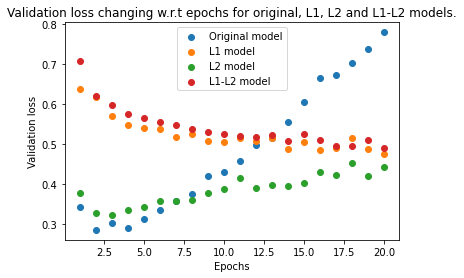

In [ ]:
x = np.arange(1,21)
plt.figure()
plt.scatter(x, original_val_loss, label="Original model")
plt.scatter(x, l1_val_loss, label="L1 model")
plt.scatter(x, l2_val_loss, label="L2 model")
plt.scatter(x, l1_l2_val_loss, label="L1-L2 model")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss changing w.r.t epochs for original, L1, L2 and L1-L2 models.")
plt.show()

<a name="adding_dropout">

## Adding Dropout

<a name="exercice15">

### Exercice 15
Modify the original network by adding a dropout after each layer of 16 nodes. Name this model dpt model

In [ ]:
dpt_model = keras.Sequential([
      keras.layers.Dense(units=16, activation="relu", input_shape=(10000,)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(units=16, activation="relu"),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(units=1, activation="sigmoid")
])

dpt_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="acc"
)

dpt_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                160016    
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


<a name="exercice16">

### Exercice 16
Fit the model on the set with previously presented parameters.

In [ ]:
dpt_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 56ms/step - loss: 0.6072 - acc: 0.6676 - val_loss: 0.4803 - val_acc: 0.8581
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 0.4696 - acc: 0.8010 - val_loss: 0.3710 - val_acc: 0.8788
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3877 - acc: 0.8581 - val_loss: 0.3155 - val_acc: 0.8877
Epoch 4/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3296 - acc: 0.8871 - val_loss: 0.2901 - val_acc: 0.8893
Epoch 5/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2857 - acc: 0.9087 - val_loss: 0.2845 - val_acc: 0.8894
Epoch 6/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2541 - acc: 0.9211 - val_loss: 0.3145 - val_acc: 0.8822
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2275 - acc: 0.9296 - val_loss: 0.2983 - val_acc: 0.8818
Epoch 8/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2111 - a

<a name="exercice17">

### Exercice 17
Plot the validation loss changing w.r.t the epochs changing for two
original and dropout model. What are your observations? Do you see any im-
provement over the original network?

In [ ]:
dpt_val_loss = dpt_hist.history["val_loss"]

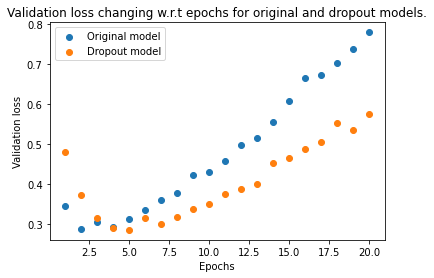

In [ ]:
x = np.arange(1,21)
plt.figure()
plt.scatter(x, original_val_loss, label="Original model")
plt.scatter(x, dpt_val_loss, label="Dropout model")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss changing w.r.t epochs for original and dropout models.")
plt.show()

<a name="house_price_dataSet">

## House Price DataSet

<a name="house-exercice1">

### Exercice 1
**Load House Price DataSet**   
The goal is to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on.  
Load the boston housing dataset in train and test and check the data shape and sizes.

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
print(f"Train size: {train_data.shape[0]}, Train shape: {train_data.shape}",
      f"Test size: {test_data.shape[0]}, Test shape: {test_data.shape}",
      sep="\n")

Train size: 404, Train shape: (404, 13)
Test size: 102, Test shape: (102, 13)


The targets are the median values of owner-occupied homes, in thousands
of dollars. Print them to check their data 2.

In [ ]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

<a name="house-exercice2">

### Exercice 2
**Normalizing data**  
For each feature in the input data (a column in the input data matrix), subtract the mean of the feature and divide by the standard deviation i.e. $∀x, x = \frac{x−μ}{σ}$.  
In this way the feature is centered around 0 and
has a unit standard deviation.  
Hint: use .mean(axis=0) and .std(axis=0) for
computing mean and standard deviation.

In [ ]:
train_data_scaled = (train_data - train_data.mean(axis=0))/train_data.std(axis=0)
test_data_scaled = (test_data - test_data.mean(axis=0))/test_data.std(axis=0)

<a name="house-exercice3">

### Exercice 3
**Model definition**  
Because so few samples are available, use a very small network with two hidden layers, each with 64 units and relu activation.  

To have a linear layer output, add a final layer with a single unit and no ac
tivation function.  
Compile the network with the mse(mean squared error) loss function.  
Monitoring a new metric during training: mean absolute error(mae).  
Finally define the optimizer = ’rmsprop’ in the model compilation.  
Define the model in a function named build_model().

In [ ]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation="relu", input_shape=(13,)))
    model.add(keras.layers.Dense(64, input_shape=(13,)))

    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics="mae"
    )

    return model

m = build_model()
m.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                896       
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
Total params: 5,056
Trainable params: 5,056
Non-trainable params: 0
_________________________________________________________________


<a name="house-exercice4">

### Exercice 4
**Model Validation**    
Use K-fold cross-validation

In [ ]:
k = 4
num_val_samples = len(train_data_scaled)// k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis =0)
    model = build_model()
    model.fit(train_data_scaled, train_targets, epochs=num_epochs, verbose=0)
    #the following line is for evaluating the test set
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


<a name="house-exercice5">

### Exercice 5
Print the overall score of your model and check its average.

In [ ]:
print("All scores",all_scores, sep=":\n")
print("Avg score:",round(np.mean(all_scores),2))

All scores:
[1818.7041015625, 1990.421142578125, 1854.423583984375, 1494.018310546875]
Avg score: 1789.39


<a name="house-exercice6">

### Exercice 6
Now training the network a bit longer: 500 epochs. To keep a record
of how well the model does at each epoch, we should modify the training loop
to save the per-epoch validation score log.   
Modify the code from the previous exercise in order to save val mean absolute error after each epoch for any fold of cross validation.  
hint: for the aim of this exercise, you can use the following lines in your code:

In [ ]:
k = 4
num_val_samples = len(train_data_scaled)// k
num_epochs = 500
all_scores = []
all_mae_history = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis =0)
    model = build_model()
    model.fit(train_data_scaled, train_targets, epochs=num_epochs, verbose=0)
    #the following line is for evaluating the test set
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_history.append(mae_history)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


<a name="house-exercice7">

### Exercice 7
Compute the average of the per-epoch mae scores for all folds.

In [ ]:
mean_mae_val_score = np.mean(all_mae_history, axis=0)
print("Average per-epoch", mean_mae_val_score, sep=":\n")

Average per-epoch:
[111.80473709  17.56415844   9.31892025   6.09049964   5.63033736
   5.05078161   4.7713635    4.81993318   4.99261737   4.45199776
   4.32168293   4.5628823    4.67618608   4.55006778   4.12694222
   4.1386283    4.17665303   4.28346783   4.4334687    4.12771696
   4.88037491   4.26069444   4.07465577   4.17494458   4.37056011
   4.06276202   4.00917983   4.02414393   3.97978765   4.15581828
   4.28796041   3.89577454   4.0857597    4.10176426   3.97886151
   3.93330348   4.00384337   3.9441781    3.85068011   4.13213801
   4.11107093   4.03637069   3.84024864   4.00449109   4.18923622
   4.04348898   4.10420537   3.98310351   3.82536715   4.06886804
   4.43716514   3.86222541   3.75084227   3.7679649    3.9535926
   4.12339067   3.82665455   3.84265804   3.91581285   3.90548021
   3.72080898   3.71173894   3.7890451    3.91077852   3.74403995
   3.78155708   3.78025514   3.7903446    3.91803187   3.78014493
   3.84334677   3.8447482    3.71838731   3.70327938   3.7

<a name="house-exercice8">

### Exercice 8
Plot the average of the per-epoch MAE scores w.r.t epochs changing.

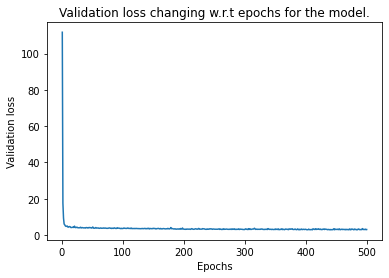

In [ ]:
x = np.arange(1,501)
plt.figure()
plt.plot(x, mean_mae_val_score)
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss changing w.r.t epochs for the model.")
plt.show()

<a name="house-exercice9">

### Exercice 9
It may be a little difficult to see the plot, due to scaling issues and
relatively high variance. Let’s do the following:
- Omit the first 10 data points, which are on a different scale than the rest of
the curve.
- Replace each point with an exponential moving average of the previous points,to obtain a smooth curve  
i.e. point = previous point∗factor +point∗(1−factor) where factor is a value between 0 and 1.   
  
According to this plot, you can check when the validation MAE stops improving or becomes worst. Past the special point on the graph, the model starts overfitting.

In [ ]:
def exponential_moving_average(list_val, factor=0.5):
    new_list = [list_val[0]]
    for i in range(1,len(list_val)):
        new_point = list_val[i-1]*factor + list_val[i]*(1-factor)
        new_list.append(new_point)
    return new_list

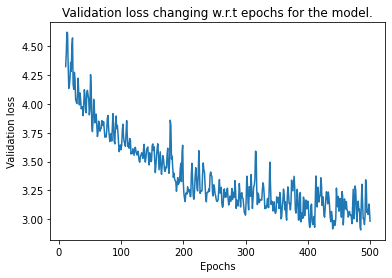

In [ ]:
x = np.arange(11,501)
plt.figure()
plt.plot(x, exponential_moving_average(mean_mae_val_score[10:]))
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss changing w.r.t epochs for the model.")
plt.show()

<a name="house-exercice10">

### Exercice 10
After finishing tuning other parameters of the model (in addition to
the number of epochs, you could also adjust the size of the hidden layers), train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data from the Exe. 1

In [ ]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(128, activation="relu", input_shape=(13,)))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(128, input_shape=(13,)))

    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics="mae"
    )
    return model

model = build_model()
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 128)               1792      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_74 (Dense)            (None, 128)               16512     
                                                                 
Total params: 18,304
Trainable params: 18,304
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_data_scaled, train_targets, epochs=num_epochs)

Epoch 1/500
13/13 [==============================] - 0s 4ms/step - loss: 27.2383 - mae: 3.8010
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 28.2343 - mae: 3.9197
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 28.9157 - mae: 4.0125
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 27.7155 - mae: 3.8656
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 26.7606 - mae: 3.7796
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 26.2201 - mae: 3.6855
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 23.1568 - mae: 3.5371
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 26.7077 - mae: 3.6996
Epoch 9/500
13/13 [==============================] - 0s 4ms/step - loss: 27.8123 - mae: 3.8895
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 21.3724 - mae: 3.4188
Epoch 11/500
13/13 [=============================

In [ ]:
model.evaluate(test_data_scaled, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 17.4039 - mae: 2.6945


[17.403886795043945, 2.694451332092285]